In [1]:
pip show fastai

Name: fastai
Version: 1.0.61
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: Pillow, torchvision, fastprogress, bottleneck, requests, matplotlib, nvidia-ml-py3, packaging, pandas, torch, pyyaml, spacy, scipy, numpy, beautifulsoup4, numexpr
Required-by: 


In [2]:
pip install fastai --upgrade

     |████████████████████████████████| 186 kB 11.2 MB/s 
     |████████████████████████████████| 56 kB 2.1 MB/s 
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
from fastai.vision.all import *

In [4]:
path=untar_data( URLs.PASCAL_2007)

In [5]:
path

Path('/root/.fastai/data/pascal_2007')

In [6]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/test')]

In [7]:
df=pd.read_csv(path/"train.csv")

In [8]:
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [9]:
df.tail()

,fname,labels,is_valid
5006,009954.jpg,horse person,True
5007,009955.jpg,boat,True
5008,009958.jpg,person bicycle,True
5009,009959.jpg,car,False
5010,009961.jpg,dog,False


In [10]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


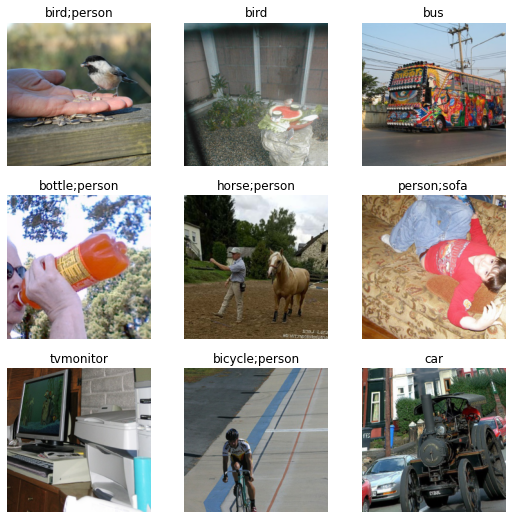

In [11]:
dls.show_batch()

In [12]:
learn=cnn_learner(dls,resnet50,metrics=partial(accuracy_multi,thresh=0.5))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [13]:
learn

SuggestedLRs(valley=0.0006918309954926372)

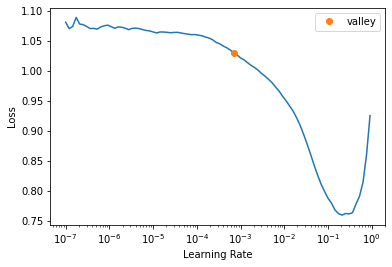

In [14]:
learn.lr_find()

In [15]:
learn.fine_tune(2,3e-2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.434232,0.126574,0.957669,01:19


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.186961,5.760561,0.902490,01:31
1,0.168045,0.132855,0.953805,01:30


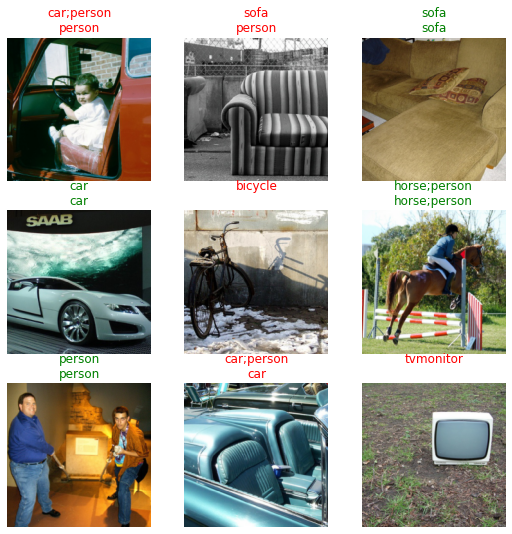

In [18]:
learn.show_results()

In [22]:
learn.predict("/content/train.jpg")

((#1) ['car'],
 tensor([False, False, False, False, False, False,  True, False, False, False,
         False, False, False, False, False, False, False, False, False, False]),
 tensor([2.6484e-03, 1.5389e-02, 3.1570e-03, 1.7885e-02, 2.1512e-03, 1.1425e-01,
         6.4770e-01, 9.3396e-04, 2.4266e-03, 1.5591e-02, 2.8307e-03, 1.4240e-03,
         7.2041e-04, 5.6831e-03, 1.8243e-01, 1.1379e-02, 3.6109e-03, 2.1119e-03,
         1.9685e-01, 5.2641e-04]))

In [23]:
learn.predict("/content/cat-4611189__480.jpg")

((#1) ['cat'],
 tensor([False, False, False, False, False, False, False,  True, False, False,
         False, False, False, False, False, False, False, False, False, False]),
 tensor([8.2589e-05, 1.3851e-04, 1.1000e-02, 1.9837e-04, 5.6443e-04, 2.4247e-04,
         2.5633e-03, 8.9386e-01, 2.0659e-03, 1.3168e-02, 4.1178e-04, 1.7070e-01,
         5.5456e-04, 5.0442e-04, 2.8501e-02, 3.6643e-03, 2.9812e-02, 2.5671e-02,
         5.3157e-04, 3.6190e-04]))

In [26]:
inter=Interpretation.from_learner(learn)

,target,predicted,probabilities,loss
0,bus;person,chair;person,"TensorBase([3.0206e-36, 1.1518e-16, 1.4724e-10, 6.7655e-29, 1.7990e-07, 5.8261e-28,\n 3.5783e-10, 2.5441e-12, 5.0846e-01, 1.5887e-21, 1.1856e-22, 1.5027e-12,\n 8.6384e-14, 1.5806e-13, 1.0000e+00, 2.4756e-17, 1.5698e-20, 7.9822e-13,\n 4.6372e-20, 2.8672e-08])",3.1710124015808105
1,bus;car;person,person,"TensorBase([3.0602e-20, 2.0987e-09, 5.2419e-06, 8.0884e-16, 8.1788e-05, 4.5446e-15,\n 2.2757e-05, 1.0359e-06, 4.7775e-01, 2.2959e-12, 4.6441e-13, 1.6579e-07,\n 8.5660e-08, 1.1008e-07, 9.9999e-01, 6.5380e-10, 5.4444e-12, 1.0995e-07,\n 7.4215e-11, 6.0588e-05])",2.2182624340057373
2,bus;person,person,"TensorBase([6.8014e-21, 7.6396e-10, 2.4807e-06, 8.5664e-17, 4.3056e-05, 4.6608e-16,\n 3.6323e-06, 1.2184e-06, 4.7533e-01, 1.6330e-12, 4.5148e-13, 1.4980e-07,\n 6.8094e-08, 3.9723e-08, 9.9999e-01, 6.6349e-10, 5.1320e-12, 1.7265e-07,\n 8.7303e-12, 5.2233e-05])",1.7973641157150269
3,chair;diningtable;person,person,"TensorBase([4.0142e-23, 6.4973e-11, 8.8681e-07, 1.1905e-18, 2.0447e-05, 6.8221e-18,\n 7.2153e-07, 1.9861e-07, 4.2612e-01, 8.4248e-14, 1.8295e-14, 3.8367e-08,\n 1.3253e-08, 5.4102e-09, 1.0000e+00, 4.6025e-11, 5.3411e-13, 2.8655e-08,\n 4.3038e-13, 1.5835e-05])",1.6242611408233643
4,bottle;person;tvmonitor,chair;person,"TensorBase([1.2327e-30, 3.3014e-14, 1.1054e-08, 2.0786e-24, 3.0939e-06, 1.0007e-23,\n 9.8303e-09, 1.1977e-09, 7.9628e-01, 4.3978e-18, 4.9801e-19, 1.0601e-10,\n 1.9027e-11, 3.4086e-11, 1.0000e+00, 3.0018e-14, 3.5596e-17, 2.2756e-10,\n 1.1350e-16, 1.4736e-06])",1.3852444887161255
5,bird;person,person,"TensorBase([0.0000e+00, 6.0425e-19, 4.7651e-11, 7.4433e-32, 1.3627e-08, 2.6924e-31,\n 2.2087e-11, 2.4636e-12, 4.1830e-01, 3.5311e-23, 1.5640e-25, 1.6076e-13,\n 5.7834e-15, 9.1232e-15, 1.0000e+00, 8.1713e-19, 7.1511e-22, 6.3411e-14,\n 3.0715e-22, 3.1667e-09])",1.2154453992843628
6,bottle;person,chair;person,"TensorBase([0.0000e+00, 1.4247e-23, 9.2905e-14, 0.0000e+00, 2.4416e-10, 3.1235e-39,\n 3.0258e-14, 1.0158e-15, 5.4160e-01, 5.5912e-29, 8.3444e-32, 1.2172e-16,\n 1.2299e-18, 1.8701e-18, 1.0000e+00, 7.6103e-24, 2.1334e-27, 2.8296e-17,\n 1.6031e-27, 3.0597e-11])",1.1456600427627563
7,bird;person,person,"TensorBase([6.0392e-34, 5.7174e-16, 4.0879e-09, 4.9671e-27, 2.4651e-07, 2.2486e-26,\n 9.0207e-10, 1.1600e-10, 4.3744e-01, 9.3849e-20, 1.5475e-21, 2.5985e-11,\n 2.2043e-12, 1.1074e-12, 1.0000e+00, 3.4549e-16, 1.4464e-18, 5.5799e-12,\n 8.3134e-19, 6.8860e-08])",0.9945247769355774
8,chair;diningtable;person,person,"TensorBase([6.6769e-15, 1.1468e-06, 6.9502e-05, 6.0905e-12, 1.7880e-03, 6.3666e-11,\n 2.8308e-04, 2.5998e-05, 3.9336e-01, 2.2094e-09, 5.8921e-09, 8.1317e-06,\n 6.9819e-06, 5.3287e-06, 9.9991e-01, 5.3849e-07, 6.7436e-09, 1.3505e-05,\n 1.4616e-08, 9.5615e-04])",0.9942963719367981


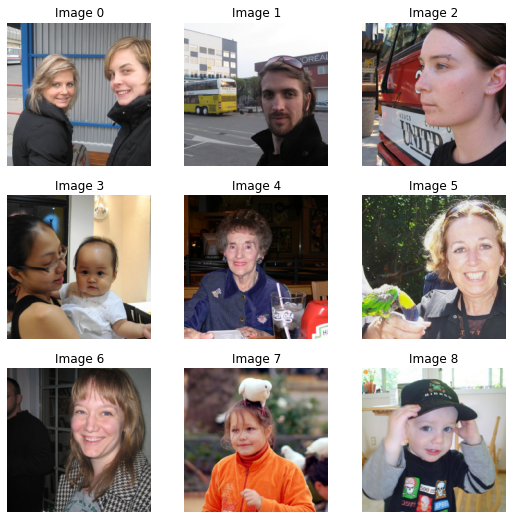

In [29]:
inter.plot_top_losses(9)